## Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts the configuration of the file we will create

import seaborn as sns

In [5]:
import os

In [9]:
print(os.getcwd())

C:\Users\Temi


Task 1 # Merging 12months of Sales Data into a single file

In [ ]:
# List All Files in a Directory

In [27]:
all_months_data = pd.DataFrame()

files = [file for file in os.listdir('./Sales_Data')]
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    print(file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_months.csv", index=False)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


### Read Data From Updated DataFrame

In [28]:
all_data = pd.read_csv("all_months.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Augment Data with Additional Columns

### Add Month Column & Convert It from String to Integer

In [46]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add Column for City

In [82]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + get_state(x))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001


## Cleaning up the Data

### Drop Rows of Nan

In [36]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


## find and Exclude 'or' From DataFrame 

In [42]:
all_data = all_data[all_data['Order Date'].str[0:2] !='Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


## Convert Columns to Correct Data Type

In [51]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # Make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # Make Float


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,11.9511.95
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Add a Sales Column

In [52]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Question 1: What was the best month for Sales? How Much was earned that month?

In [92]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [ ]:
### Best month for sales is December with approx 4.6m USD

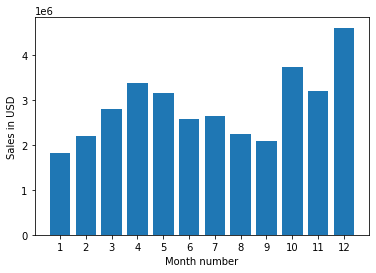

In [93]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()

## What city has the highest number of sales

In [94]:
output = all_data.groupby('City').sum()
output

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA 30301,16602,2.779908e+06,104794,2.795499e+06
Austin TX 73301,11153,1.809874e+06,69829,1.819582e+06
Boston MA 02215,22528,3.637410e+06,141112,3.661642e+06
Dallas TX 75001,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA 90001,33289,5.421435e+06,208325,5.452571e+06
New York City NY 10001,27932,4.635371e+06,175741,4.664317e+06
Portland ME 04101,2750,4.471893e+05,17144,4.497583e+05
Portland OR 97035,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA 94016,50239,8.211462e+06,315520,8.262204e+06


### Answer: Sanfrancisco with approx 8m USD

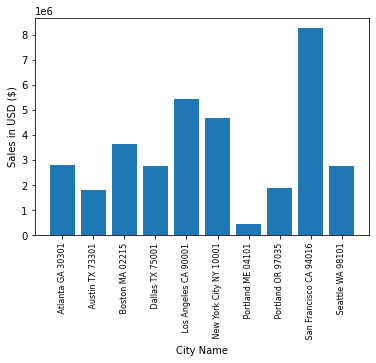

In [98]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, output['Sales'])
plt.xticks(cities, rotation ='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

## What time should we display advert to maximize the potential of a customer buyer

In [102]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [105]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001,9,27


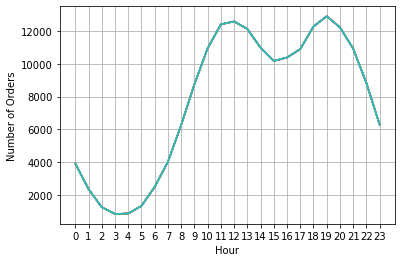

In [108]:
import matplotlib.pyplot as plt

hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.ylabel('Number of Orders')
plt.xlabel('Hour')
plt.show()

### Our Ad should start running 1 hr before 12noon and 7pm which is the best times with the highest sale

## What Products are most often sold together

In [109]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

<ipython-input-109-50d7ea3b1e2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [114]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key,value in count.most_common(10):
    print (key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Ans: Iphone and Lightning Charging Cable

## What Product Sold the Most? Why Do You Think It Sold The Most

In [115]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001,9,27


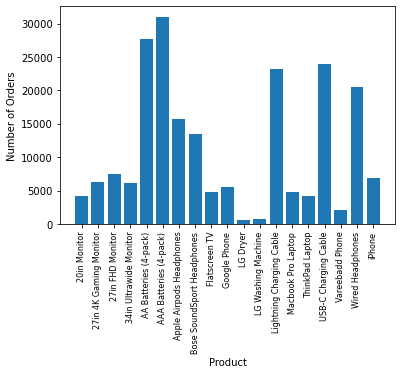

In [118]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation ='vertical', size=8)
plt.ylabel('Number of Orders')
plt.xlabel('Product')
plt.show()

### AAA BATTERIES SOLD THE MOST